In [9]:
import os
import subprocess
import numpy as np
import matplotlib.pyplot as plt
import utils as ut

system_name = 'kite3d_couetteframe'
run_name = 'et_00'
#source_dir = '../data/'+system_name+'/'+run_name+'/'
#data_dir = '../data/'+system_name+'/'+run_name+'_eval/'
data_dir = '../data/'+system_name+'/'+run_name+'/'
plot_dir = '../plots/'+system_name+'/'+run_name+'/'

## Evaluate

In [10]:
# READING THE ENVIRONMENTAL PARAMETERS
env_params = ut.read_params(data_dir+'param_env.txt')
for ep in env_params:
    print(ep, env_params[ep])
alg_params = ut.read_params(data_dir+'param_alg.txt')
for ep in alg_params:
    print(ep, alg_params[ep])
#eps = ut.p_law_burn(alg_params['n_steps'], alg_params['eps_burn'], alg_params['eps_expn'], alg_params['eps0'], alg_params['epsc'])

int_steps 0.001
ep_length 200.0
ep_length_eval 1000.0
decision_time 0.25
alphas [  6.   8.  10.  12.  14.  16.  18.  20.]
CL_alphas [ 0.65  0.75  0.82  0.9   1.    1.08  1.1   1.05]
CD_alphas [ 0.05  0.07  0.09  0.1   0.13  0.18  0.18  0.21]
init_theta 0.7853981633974483
init_dtheta 0.0
init_alpha 7.0
beta_bins [-3.14159265 -2.6927937  -2.24399475 -1.7951958  -1.34639685 -0.8975979
 -0.44879895  0.          0.44879895  0.8975979   1.34639685  1.7951958
  2.24399475  2.6927937   3.14159265]
banks [-0.26179939 -0.20943951 -0.15707963 -0.10471976 -0.05235988  0.
  0.05235988  0.10471976  0.15707963  0.20943951  0.26179939]
init_bank 5.0
init_phi 0.0
init_dphi 0.0
init_xblock 0.0
init_yblock 0.0
wind_type turboframe
wind_amplification 1.0
windv_file_path ../data/kite3d_couetteframe/v.txt
windq_file_path ../data/kite3d_couetteframe/q.txt
alg_type et
lambda 0.9
gamma 1.0
n_steps 300000000.0
traj_points 200.0
eval_steps 20000.0
lr0 0.01
lrc 375000.0
lr_expn 0.8
lr_burn 200000000.0
eps0 0.001


In [4]:
#WRITING THE EVALUATION PARAMETERS
params = dict()
params['alg_type'] = 'eval'
params['quality_path'] = data_dir+'/best_quality.txt'
params['ev_time'] = 3000 # sec
params['n_steps'] = params['ev_time']/float(env_params['decision_time'])+1
params['traj_points'] = params['n_steps']
params['gamma'] = 1
params['epsilon'] = 0
#params['epsilon'] = eps
ut.write_params(params, data_dir, 'param_alg.txt')

env_params['ep_length'] = params['ev_time']-1
ut.write_params(env_params, data_dir, 'param_env.txt')

In [28]:
p = subprocess.Popen(["./run.exe", system_name, run_name+'_eval'], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
#print(p.stderr.read().decode('utf-8'))

In [11]:
s_traj, s_head = ut.read_traj(data_dir + 'ev_states.txt')

In [13]:
xs = np.linspace(0, alg_params['eval_steps']*env_params['decision_time'], int(alg_params['eval_steps']))

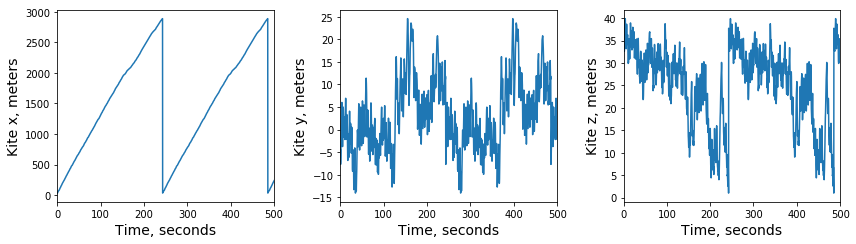

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,3.5))

lim = [0,500]

ax1.set_xlim(lim)
ax1.set_xlabel('Time, seconds', fontsize=14)
ax1.set_ylabel('Kite x, meters', fontsize=14)
ax1.plot(xs, s_traj[:,0])

ax2.set_xlim(lim)
ax2.set_xlabel('Time, seconds', fontsize=14)
ax2.set_ylabel('Kite y, meters', fontsize=14)
ax2.plot(xs, s_traj[:,1])

ax3.set_xlim(lim)
ax3.set_xlabel('Time, seconds', fontsize=14)
ax3.set_ylabel('Kite z, meters', fontsize=14)
ax3.plot(xs, s_traj[:,2])

plt.tight_layout()
plt.savefig(plot_dir+"eval_traj_true.png", dpi=200)
plt.show()

In [23]:
info_traj, labels = ut.read_traj(data_dir+'ev_info.txt')

In [24]:
labels

['state_index', 'state_descr', 'acion_index', 'action_decr', 'reward']

In [25]:
np.array(info_traj[:,4][:100], dtype=float)

array([ 2.27018,  3.05702,  3.48043,  3.55522,  3.43072,  3.26918,
        3.09927,  2.9524 ,  2.90885,  3.04837,  3.17346,  3.21701,
        3.18785,  3.13086,  3.11133,  3.17526,  3.17478,  3.20611,
        3.33317,  3.37122,  3.8733 ,  3.87253,  3.64405,  3.48195,
        3.52841,  3.74316,  3.91083,  3.85371,  3.70258,  3.5268 ,
        3.39593,  3.35682,  3.32934,  3.49518,  3.57942,  3.43337,
        3.2574 ,  3.06371,  2.8622 ,  2.76117,  2.94152,  3.48098,
        3.65351,  3.68673,  3.64205,  3.54047,  3.37819,  3.21389,
        3.18278,  3.49393,  3.94078,  4.09046,  3.97289,  3.82765,
        3.67036,  3.53677,  3.43982,  3.3456 ,  3.36725,  3.30438,
        3.13903,  3.04289,  3.30033,  3.7225 ,  3.8838 ,  3.80274,
        3.63942,  3.44571,  3.23934,  3.04827,  2.91589,  2.92627,
        3.35608,  3.493  ,  3.43971,  3.36694,  3.21998,  3.2737 ,
        3.70466,  3.8151 ,  3.60871,  3.38063,  3.22853,  3.36542,
        3.7359 ,  3.85935,  3.74252,  3.58373,  3.44102,  3.34

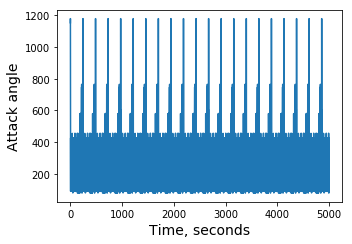

In [26]:
fig, (ax1) = plt.subplots(1,1, figsize=(5,3.5))
#x_wind = [0,200]

ax1.set_xlabel('Time, seconds', fontsize=14)
ax1.set_ylabel('Attack angle', fontsize=14)
#ax1.set_xlim(x_wind)
ax1.plot(xs, np.array(info_traj[:,0], dtype=float))

plt.tight_layout()
plt.savefig(plot_dir+"eval_pol.png", dpi=200)
plt.show()

In [34]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,3.5))

lim = [0,500]

ax1.set_xlim(lim)
ax1.set_xlabel('Time, seconds', fontsize=14)
ax1.set_ylabel('Kite x, meters', fontsize=14)
ax1.plot(xs, traj_x)

ax2.set_xlim(lim)
ax2.set_xlabel('Time, seconds', fontsize=14)
ax2.set_ylabel('Kite y, meters', fontsize=14)
ax2.plot(xs, traj_y)

ax3.set_xlim(lim)
ax3.set_xlabel('Time, seconds', fontsize=14)
ax3.set_ylabel('Kite z, meters', fontsize=14)
ax3.plot(xs, traj_z)

plt.tight_layout()
#plt.savefig(plot_dir+"eval_traj.png", dpi=200)

NameError: name 'traj_x' is not defined

In [28]:
beta_list = []
for i in range(len(env_params['beta_bins'])-1):
    beta_list.append((env_params['beta_bins'][i] + env_params['beta_bins'][i+1])/2.0)

In [29]:
def aggr_state_index_translator(index, n_betas, n_banks):
    beta = index % n_betas
    rest = index // n_betas
    bank = rest % n_banks
    alpha = rest // n_banks
    return beta, bank, alpha

In [30]:
beta_i, bank_i, alpha_i = aggr_state_index_translator(aggr_s_i_traj, len(env_params['beta_bins'])-1, len(env_params['banks']))
alphas = np.take(env_params['alphas'], alpha_i)
banks = np.take(env_params['banks'], bank_i)
betas = np.take(beta_list, beta_i)

NameError: name 'aggr_s_i_traj' is not defined

In [31]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,3.5))
x_wind = [0,200]

ax1.set_xlabel('Time, seconds', fontsize=14)
ax1.set_ylabel('Attack angle', fontsize=14)
ax1.set_xlim(x_wind)
ax1.plot(xs, alphas)

ax2.set_xlabel('Time, seconds', fontsize=14)
ax2.set_ylabel('Bank angle', fontsize=14)
ax2.set_xlim(x_wind)
ax2.plot(xs, banks)

ax3.set_xlabel('Time, seconds', fontsize=14)
ax3.set_ylabel('Vrel angle', fontsize=14)
ax3.set_xlim(x_wind)
ax3.plot(xs, betas)

plt.tight_layout()
plt.savefig(plot_dir+"eval_pol.png", dpi=200)
plt.show()

NameError: name 'alphas' is not defined

In [32]:
def bins_from_list(l):
    bins = np.array([(l[i] + l[i+1])/2 for i in range(len(l)-1)])
    bins = np.append(2*l[0] - bins[0], bins)
    bins = np.append(bins, 2*l[-1] - bins[-1])
    return bins

In [33]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,3.5))

ax1.set_ylabel('Counts', fontsize=14)
ax1.set_xlabel('Attack angle', fontsize=14)
bins = bins_from_list(env_params['alphas'])
ax1.set_xticks(env_params['alphas'])
ax1.hist(alphas, bins=bins, align='mid', rwidth=0.8)

ax2.set_ylabel('Counts', fontsize=14)
ax2.set_xlabel('Bank angle', fontsize=14)
bins = bins_from_list(env_params['banks'])
#ax2.set_xticks(env_params['banks'])
ax2.hist(banks, bins=bins, align='mid', rwidth=0.8)

ax3.set_ylabel('Counts', fontsize=14)
ax3.set_xlabel('Vrel angle', fontsize=14)
bins = bins_from_list(beta_list)
#ax2.set_xticks(env_params['banks'])
ax3.hist(betas, bins=bins, align='mid', rwidth=0.8)

plt.tight_layout()
plt.savefig(plot_dir+"aggr_states.png", dpi=200)
plt.show()

NameError: name 'alphas' is not defined